# Contents :

0. About Data
1. Import Libraries and data 
2. Data Inspection
3. Data Cleaning :
    - Missing values imputation
    - Dealing with inconsistent values
4. Data Visualization
5. Feature Engineering
6. Feature Scalling

## About Data

- Item_Identifier : Unique product ID

- Item_Weight : Weight of product

- Item_Fat_Content : Whether the product is low fat or not

- Item_Visibility : The % of total display area of all products in a store allocated to the particular product

- Item_Type : The category to which the product belongs

- Item_MRP : Maximum Retail Price (list price) of the product

- Outlet_Identifier : Unique store ID

- Outlet_Establishment_Year : The year in which store was established

- Outlet_Size : The size of the store in terms of ground area covered

- Outlet_Location_Type : The type of city in which the store is located

- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales : Sales of the product in the particular store.

## Import Libraries and data 

### Import Libraries

In [149]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

### Import Data

In [150]:
data = pd.read_csv(r"D:\udacity mentorship\abdullah\9\Bigmart EDA\Train.csv")

## Data inspection

In [151]:
data.shape

(8523, 12)

As above in the training data  we have 8523 rows and 12 columns while in the test data  we have 5681 rows and 11 columns.

In [152]:
# getting null values in training data 
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [153]:
#17 % of the item_weight column is null while 28% of the outlet_size column is null in the data 
(data.isna().sum()/data.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [155]:
categorical = data.select_dtypes(include = [np.object])
numerical = data.select_dtypes(include = [np.float64 ,np.int64 ])
print(f'there is {categorical.shape[1]} categorical columns and {numerical.shape[1]} numerical columns in the training data set')

there is 7 categorical columns and 5 numerical columns in the training data set


In [156]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Cleaning

### Missing values imputation

#### 1) Item Weight

In [157]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [158]:
data['Item_Weight'].isna().sum()

1463

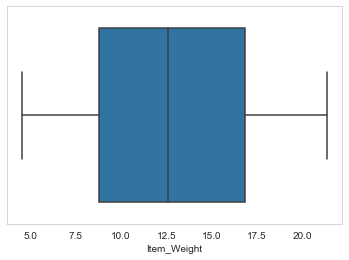

In [159]:
base_color = sns.color_palette()[0]
sns.boxplot(data['Item_Weight'],color = base_color);

- since the boxplot shows that there is no outliers then we can use the mean to impute missing values

In [160]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)

In [161]:
data['Item_Weight'].isna().sum()

0

**Item Weight missing values imputed with the mean**

#### 2) Outlet Size 

In [162]:
data['Outlet_Size'].isnull().sum()

2410

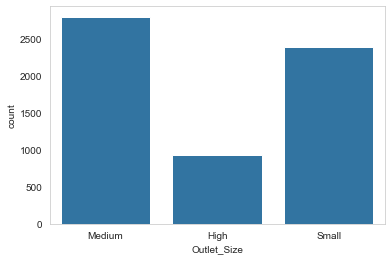

In [163]:
sns.countplot(data['Outlet_Size'] , color = base_color);

**Since the Outlet size is categorical I'll impute the missing values with mode**

In [164]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace = True)

In [165]:
data['Outlet_Size'].isna().sum()

0

**Outlet Size missing values imputed with the mode**

### Dealing with inconsistent values

In [166]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [167]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [168]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [169]:
# handling inconsistent values
data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [170]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [171]:
data['Item_Fat_Content']= data['Item_Fat_Content'].astype(str)

## Data Visualization

### Univariate Analysis

#### Numerical variables

In [172]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid", {'axes.grid' : False})

#### 1) Item_Weight

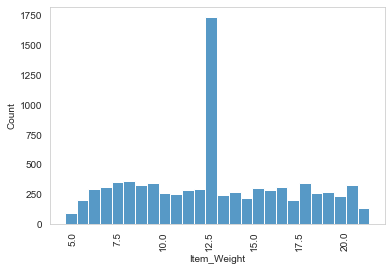

In [173]:
sns.histplot(data['Item_Weight']);
plt.xticks(rotation = 90);

- The data  is centered about the mean
- The data  is not skewed
- The data  doesn't follow normal distribution

#### 2) Item_Visibility

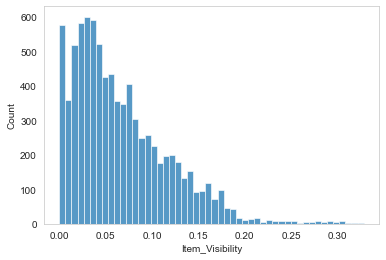

In [174]:
sns.histplot(data['Item_Visibility']);

- The data  is skewed to the right
- The data  doesn't follow normal distribution

#### 3) Item_MRP

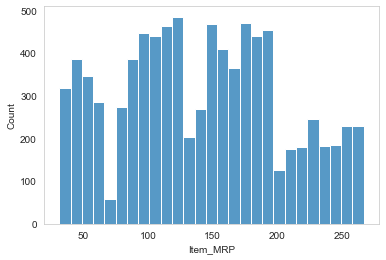

In [175]:
sns.histplot(data['Item_MRP']);


- The data  is not skewed
- The data  doesn't follow normal distribution
- The data  has many peaks

#### 4) Outlet_Establishment_Year

In [176]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

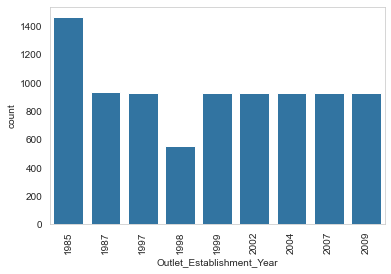

In [177]:
base_color = sns.color_palette()[0]

sns.countplot(data['Outlet_Establishment_Year'],color = base_color);

plt.xticks(rotation = 90);

- 1985 is the year with the most stores establishments

#### 5) Item_Outlet_Sales

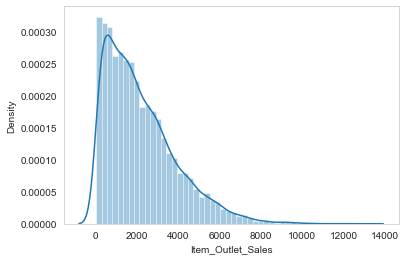

In [178]:
sns.distplot(data['Item_Outlet_Sales']);

- The data  is skewed to the right
- The data  shows peakness
- The data  doesn't follow normal distribution

In [179]:
# check for Skewness
print("Skewness ", data['Item_Outlet_Sales'].skew())


Skewness  1.1775306028542796


#### categorical variables

##### 1) Item Fat Content

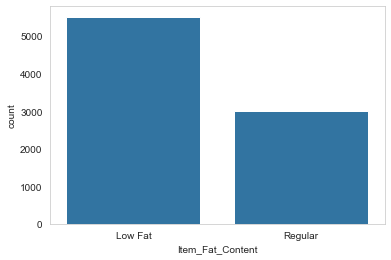

In [180]:
sns.countplot(data['Item_Fat_Content'],color = base_color);


- The Items bought are more of Low Fat.

#### 2) Item Type

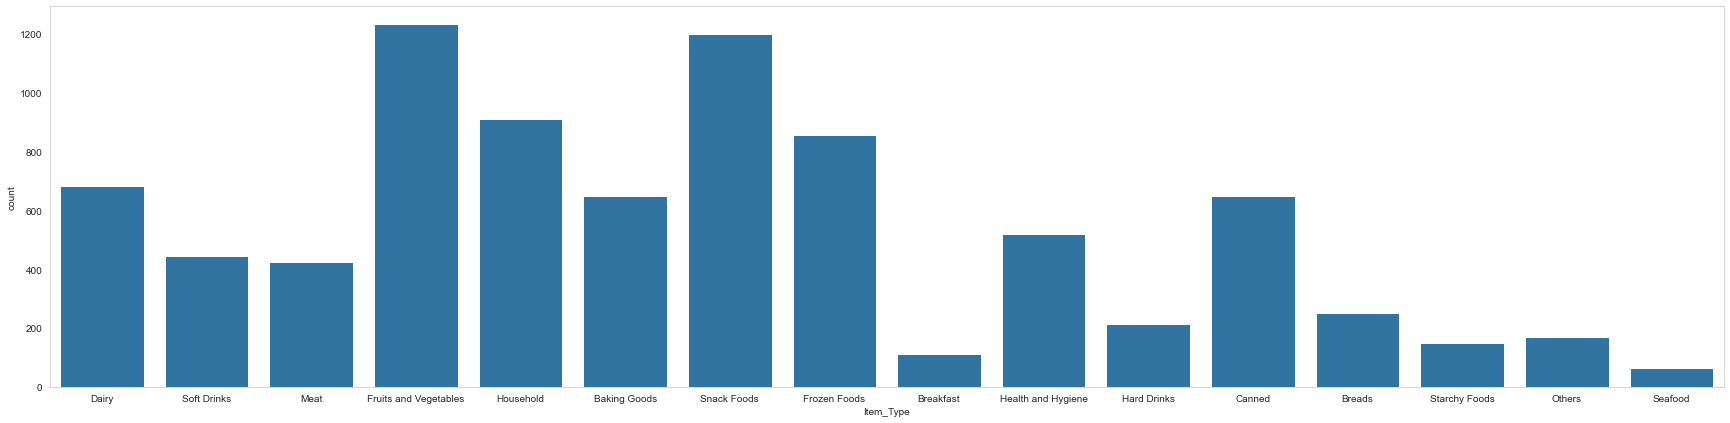

In [181]:
plt.figure(figsize=(30,7))
sns.countplot(data['Item_Type'],color = base_color);

- Fruits and vegetables have the largest amount of sales
- Snacks have a lot of sales too

#### 3) Outlet Size

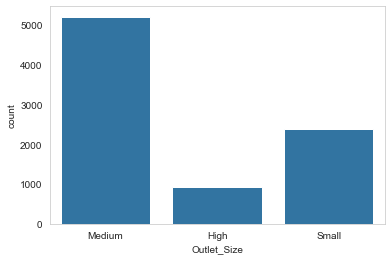

In [182]:
sns.countplot(data['Outlet_Size'],color = base_color);

- The Outlets are more of Medium Size

#### 4) Outlet Location Type

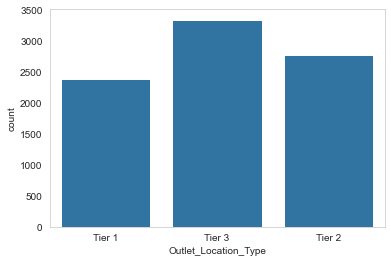

In [183]:
sns.countplot(data['Outlet_Location_Type'],color = base_color);

- The Outlets are maximum in number in Tier 3 Cities.

#### 5) Outlet Type

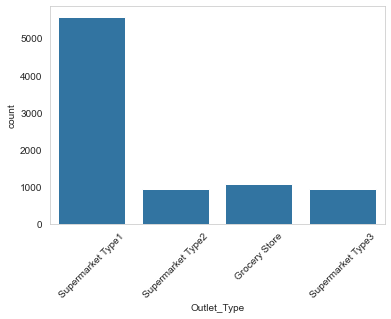

In [184]:
sns.countplot(data['Outlet_Type'],color = base_color);
plt.xticks(rotation = 45);

- The Outlets are more of Supermarket Type1.

### Bivariate Analysis

In [185]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### 1) Item Fat Content

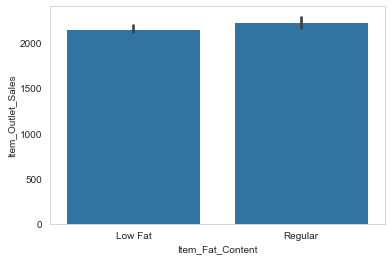

In [186]:
sns.barplot(data  = data , x = 'Item_Fat_Content' , y = 'Item_Outlet_Sales' , color = base_color);

- both low fat and regular fat sales are very close

#### 2) Item Visibility

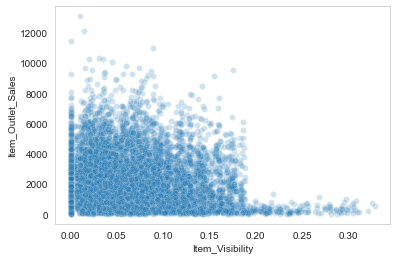

In [187]:
sns.scatterplot(data  = data , x = 'Item_Visibility' , y = 'Item_Outlet_Sales' , color = base_color , alpha = 0.2);

- Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

**I'll deal with zero visibality as a missing value and change it to the mean value.**

In [188]:
data['Item_Visibility'].replace(0,data['Item_Visibility'].mean(),inplace = True)

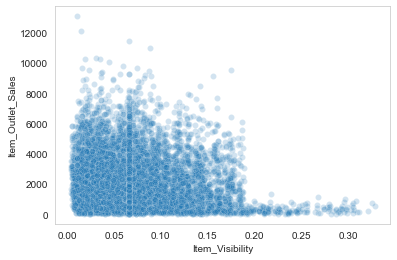

In [189]:
sns.scatterplot(data  = data , x = 'Item_Visibility' , y = 'Item_Outlet_Sales' , color = base_color , alpha = 0.2);

#### 3) Item Type

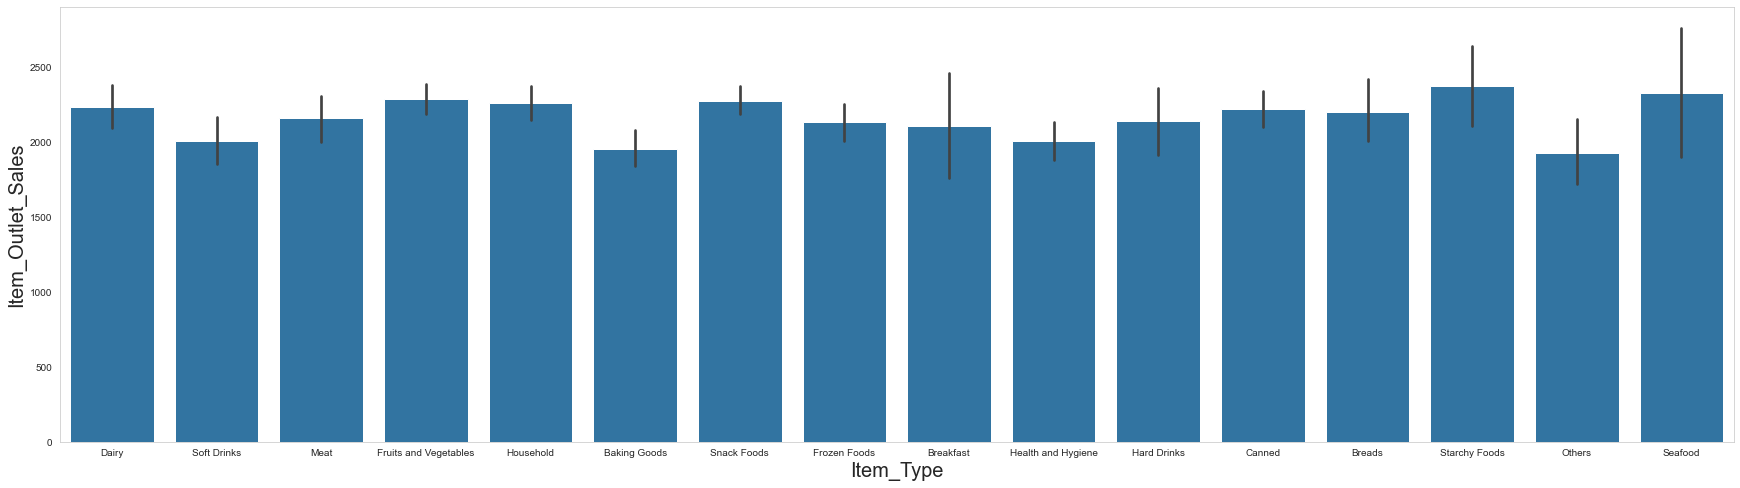

In [190]:
plt.figure(figsize=(30,8))
sns.barplot(data  = data, y = 'Item_Outlet_Sales' , x = 'Item_Type' , color = base_color);
plt.xlabel('Item_Type',fontdict = {'fontsize' : 20});
plt.ylabel('Item_Outlet_Sales',fontdict = {'fontsize' : 20});

- The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

#### 4) Item MRP

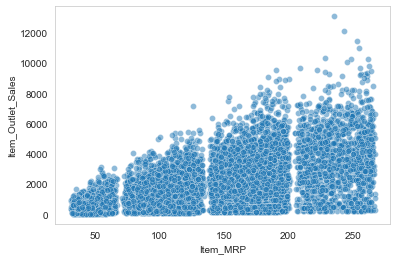

In [191]:
sns.scatterplot(data  = data , x = 'Item_MRP' , y = 'Item_Outlet_Sales' , color = base_color , alpha = 0.5);

- Item MRP and item outlet sales are directly proportional.

#### 5) Outlet Size

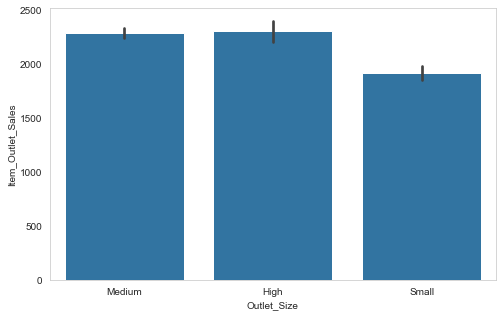

In [192]:
plt.figure(figsize=(8,5))
sns.barplot(data  = data , x = 'Outlet_Size' , y = 'Item_Outlet_Sales' , color = base_color );


- The Outlet Sales is maximum for Medium and High sized Outlets.
- The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

#### 6) Outlet Location Type

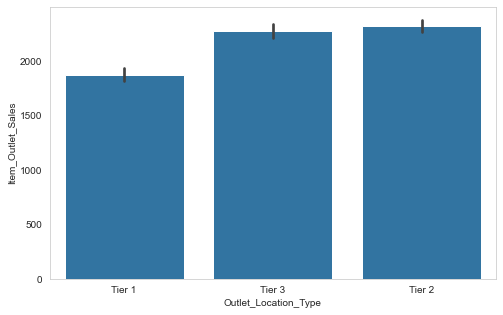

In [193]:
plt.figure(figsize=(8,5))
sns.barplot(data  = data , x = 'Outlet_Location_Type' , y = 'Item_Outlet_Sales' , color = base_color );

- The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

### Multivariate Analysis

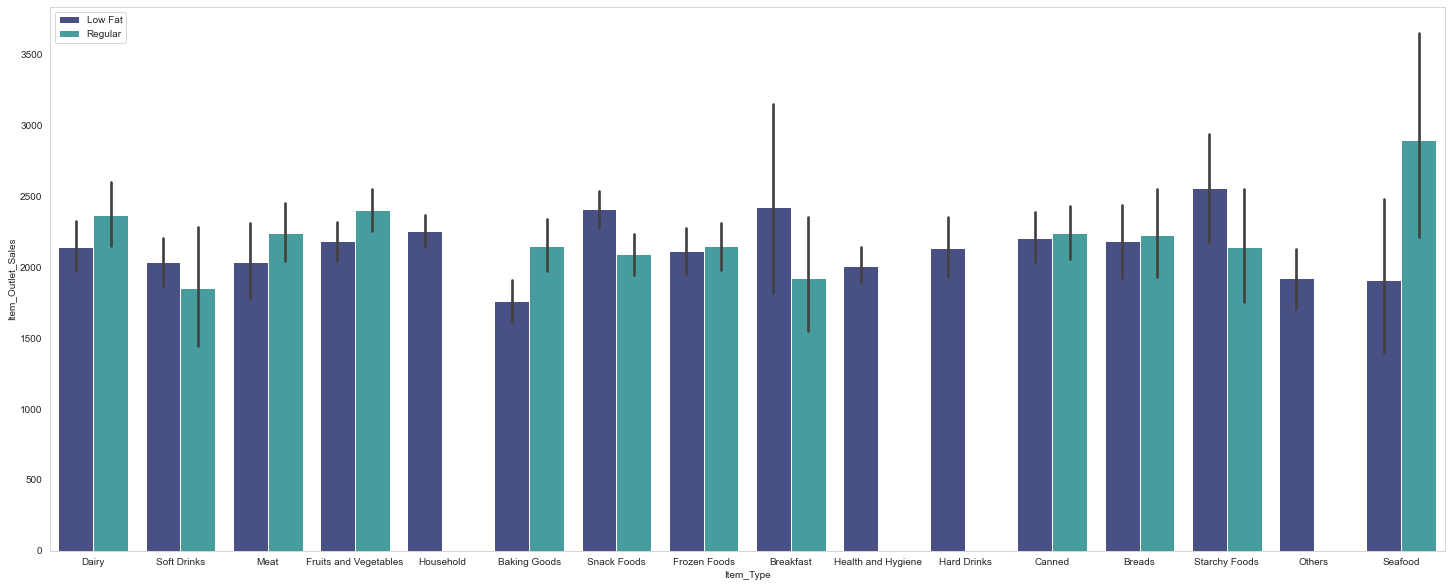

In [194]:
plt.figure(figsize=(25,10));
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data = data,palette='mako');
plt.legend();

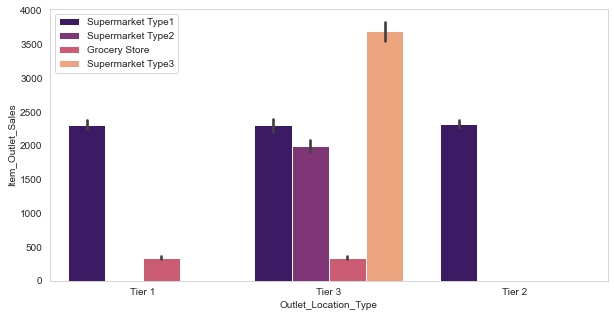

In [195]:
plt.figure(figsize=(10,5));
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data = data,palette='magma');
plt.legend();

- The Tier-3 location type has all types of Outlet type and has high sales margin.

## Feature Engineering

In [196]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Categorical Data

For categorical data you can either use: 
1. Label encoding
2. One hot encoding

In [197]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [198]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052


In [199]:
data = data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [200]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [201]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,1,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052


## For Continous data we use:

1. min max scaler
2. Standard scaler: performes well when the data contains outliers

In [202]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame()
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']])



In [203]:
data = data.drop(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'],axis=1)

In [209]:
# Place the DataFrames side by side
data = pd.concat([data, df], axis=1)
data

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,4,1,0,1,0.282525,0.038399,0.927507,0.283587
1,1,14,1,2,2,0.081274,0.048346,0.072068,0.031419
2,0,10,1,0,1,0.770765,0.040593,0.468288,0.158115
3,1,6,1,2,0,0.871986,0.192593,0.640093,0.053555
4,0,9,0,2,1,0.260494,0.192593,0.095805,0.073651
...,...,...,...,...,...,...,...,...,...
8518,0,13,0,2,1,0.137541,0.163812,0.777729,0.210293
8519,1,0,1,1,1,0.227746,0.133638,0.326263,0.039529
8520,0,8,2,1,1,0.359929,0.097321,0.228492,0.088850
8521,1,13,1,2,2,0.158083,0.436080,0.304939,0.138835


# Now the model is ready for machine learning algorithms